In [175]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [176]:
df=pd.read_csv('data.csv',usecols=[2,3,4,5,6,7,8,9,10,11,12,13])
#features
x_test=pd.concat([ df[3501:]])
df=pd.concat([ df[:3500]])
df.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [177]:
Y=pd.read_csv('data.csv',usecols=['price'])
#labels
Y_test=pd.concat([ Y[3501:]])
Y=pd.concat([ Y[:3500]])

Y.head()

,price
0,313000.0
1,2384000.0
2,342000.0
3,420000.0
4,550000.0


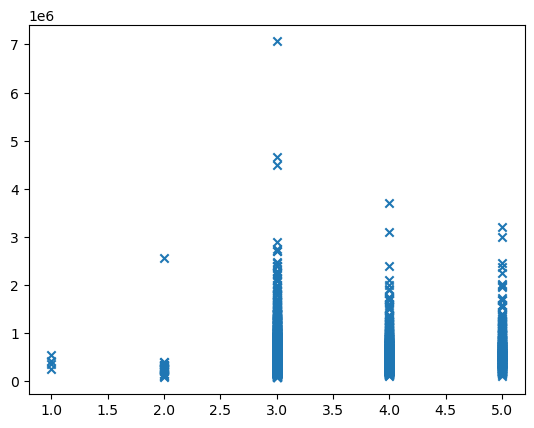

In [178]:
plt.scatter(df['condition'], Y, marker='x') 
plt.show()

In [179]:
x=df.values
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)
Y = np.where(Y== 0, 1e-5, Y)
print("Shape of x:", x.shape)
print("Shape of Y:", Y.shape)
print("Shape of par:", par.shape)
print("Shape of y:", y.shape)
print("Any NaN in x?", np.isnan(x).any())
print("Any NaN in Y?", np.isnan(Y).any())


Shape of x: (3500, 12)
Shape of Y: (3500, 1)
Shape of par: (12, 1)
Shape of y: (99, 1)
Any NaN in x? False
Any NaN in Y? False


In [186]:
#making the model
n=12 #number of features
m=df.shape[0] #num of examples(training)
par=np.zeros((n,1))

y=np.dot(x,par)
for z in range(1000):
   gradient = (1/m) * np.dot(x.T, (y - Y)) 
   par = par - (0.001 * gradient)  
   y = np.dot(x, par)  
print (par)


[[ 11216.43862344]
 [ 45964.95778787]
 [ 89488.11088237]
 [ -3068.74904501]
 [ 24440.26132364]
 [ 38474.91328369]
 [ 50460.42319227]
 [ 17332.37934209]
 [ 77909.74861462]
 [ 41775.4595135 ]
 [-30624.93384972]
 [  6481.25383271]]


In [187]:
#Testing
y=np.dot(x_test,par)



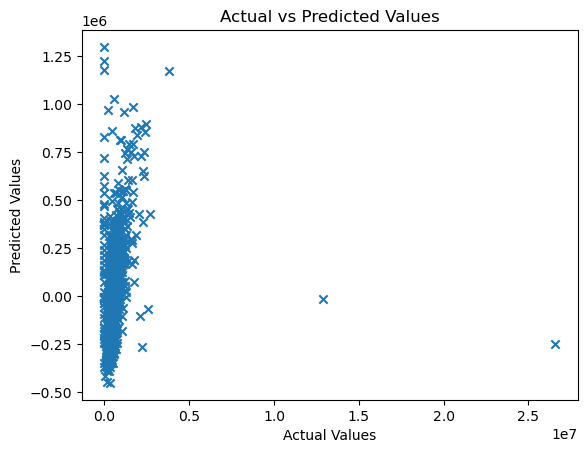

In [188]:
Y_test = np.where(Y_test == 0, 1e-5, Y_test)
plt.scatter(Y_test, y ,marker='x')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [191]:
p = 0
for q in range(99):
    p += np.abs(y[q] - Y_test[q]) / Y_test[q]  # Absolute error divided by actual value
p /= 99  # Averaging the error

# Convert to percentage and print the result
print(p * 100)


[127.03665462]
